# **Deber No.4 (Replica de casos)**
### *Creado por: Carlos Brusil*



*   Fecha de Creación: 21 de mayo de 2023
*   Fechad de actualización: 21 de mayo de 2023
*   Descripción: Una vez que se realizo la parte econometrica se busca analizar los modelos de ML mediante casos ya revisados  

In [1]:
import pandas as pd #importo la libreria panda permite manipular y molderar los datos 
import numpy as np #importo la libreria numpy manipular y molderar los datos 
import matplotlib.pyplot as plt #importo libreria matplotlib que es una libreria que me permite realizar graficas en 2 dimensiones de de mis datos
import seaborn as sns #Esta libreria nos permite modificar la vizualizacion de los datos atraves de los coleres y mejorar presetancion de los mismo 
from sklearn.linear_model import LinearRegression #para realizar regresiones y modelos
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler #Herramienta para la estandarizaci[on de datos
from sklearn.model_selection import train_test_split #herramienta para validacion prueba entrebamiento
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


import statsmodels.stats.api as sms # paquete para modelamiento estadistico
import statsmodels.api as sm
from statsmodels.formula.api import ols #importo el paquete de requesión de cuadrados ordinarios
from statsmodels.compat import lzip

## Bank Data

In [2]:
bnk_df = pd.read_csv('bank-additional-full.csv', delimiter = ';')

In [3]:
var_cuant = bnk_df.select_dtypes('number').columns
var_cual  = bnk_df.select_dtypes('object').columns

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder() 
#importamos la herramienta desde la biblioteca de SKLEARN para codificar nestras variables categoricas 

In [5]:
bnk_df[var_cual]=bnk_df[var_cual].apply(LabelEncoder().fit_transform)

In [6]:
bnk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [7]:
log_dur=np.log(bnk_df.duration)
bnk_df['log_dura']=log_dur

In [8]:
X_log = bnk_df.loc[:,['age', 'marital', 'education', 'default',
       'contact', 'campaign', 'pdays', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m']]
y_log = bnk_df.loc[:,'y']

In [9]:
X_train_log , X_test_log , y_train_log , y_test_log = train_test_split(X_log , y_log , test_size = 0.10,random_state =123)

In [10]:
print(X_train_log.shape,"",type(X_train_log))
print(X_train_log.shape,"\t ",type(y_train_log))
print(X_test_log.shape,"",type(X_test_log))
print(X_test_log.shape,"\t ",type(y_test_log))

(37069, 12)  <class 'pandas.core.frame.DataFrame'>
(37069, 12) 	  <class 'pandas.core.series.Series'>
(4119, 12)  <class 'pandas.core.frame.DataFrame'>
(4119, 12) 	  <class 'pandas.core.series.Series'>


In [11]:
modelo1 = LogisticRegression()
modelo1.fit(X_train_log, y_train_log)

LogisticRegression()

### Predicciones

In [12]:
predicciones_train_log = modelo1.predict(X_train_log)
predicciones_test_log  = modelo1.predict(X_test_log)

### Evaluacion

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [14]:
cm_df = pd.DataFrame(metrics.confusion_matrix(y_test_log, predicciones_test_log),range(2),range(2))
cm_df

,0,1
0,3624,47
1,358,90


[Text(0.5, 42.383333333333326, 'Actual Label'),
 Text(50.722222222222214, 0.5, 'Prediction Label')]

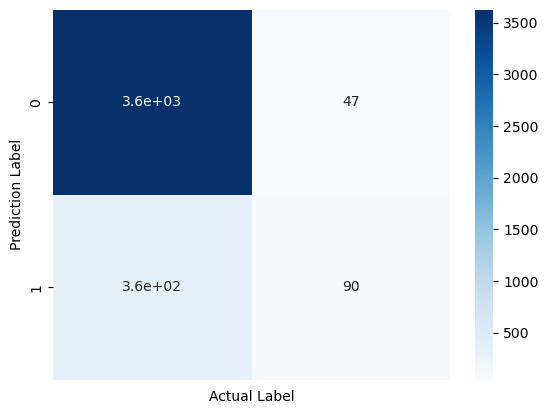

In [15]:
cm = sns.heatmap(cm_df, xticklabels= '',annot = True, cmap = 'Blues') #para cambiar el color del mapa d color en este caso para los mapas de calor se debe usar el argumento 'cmap' y para observar los collores disponibles 
# ingresamos al siguiente link: https://likegeeks.com/seaborn-heatmap-tutorial/#:~:text=You%20can%20change%20the%20color,cmap%20attribute%20of%20the%20heatmap.
#ademas usamos el argumento 'annot' con el 'True' para que aparezca texto dentro del grafico
cm.set(xlabel='Actual Label', ylabel='Prediction Label') #agrego el titulo de los ejes 

In [16]:
print('Precision: %.2f' % precision_score(y_test_log, predicciones_test_log)) #Metrica de precision

Precision: 0.66


In [17]:
print('Recall: %.2f' % recall_score(y_test_log, predicciones_test_log)) #Recall 

Recall: 0.20


In [18]:
print('F1 Score: %.2f' % f1_score(y_test_log, predicciones_test_log)) #metrica f1 

F1 Score: 0.31


Tras las metricas podemos observar que el modelo califica de manera correcta eol total de positivos en un 66% que es un nivel bueno, mientras que el porcentaje de la variable objetivo correctamente clasificado fue del 20% y en un nivel de F1 se ontiene el 31%

### Regresion logistica 

In [19]:
regresion_multinomial1 = sm.MNLogit(y_log, X_log)
results1=regresion_multinomial1.fit()

Optimization terminated successfully.
         Current function value: 0.287354
         Iterations 7


In [20]:
print(results1.summary())

                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                41188
Model:                        MNLogit   Df Residuals:                    41176
Method:                           MLE   Df Model:                           11
Date:                Sun, 21 May 2023   Pseudo R-squ.:                  0.1837
Time:                        11:18:54   Log-Likelihood:                -11836.
converged:                       True   LL-Null:                       -14499.
Covariance Type:            nonrobust   LLR p-value:                     0.000
           y=1       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
age                0.0073      0.002      4.446      0.000       0.004       0.011
marital            0.1118      0.031      3.588      0.000       0.051       0.173
education          0.0402      0.008

Las variables que se escogieron fueron por las corridas anteriores  de los anteriores scripts donde se observa que todas las variables escogidas han sido estadisticamente significativas.

## Marketing data 

In [21]:
mkt_df = pd.read_csv('Dummy Data HSS(1).csv')

In [22]:
mkt_df.columns= mkt_df.columns.str.lower() #Defino a todos los nombres de las columnas en letra minuscula

In [23]:
mkt_df.columns = mkt_df.columns.str.replace(' ', '') #en esta linea realizo el cambio de los espacios del nombre de las columnas por 
#el '_' 

In [24]:
mkt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   tv           4562 non-null   float64
 1   radio        4568 non-null   float64
 2   socialmedia  4566 non-null   float64
 3   influencer   4572 non-null   object 
 4   sales        4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [25]:
mkt_df = mkt_df.dropna() # elimino los valores perdidos 

In [26]:
var_cuant = mkt_df.select_dtypes('number').columns
var_cual  = mkt_df.select_dtypes('object').columns

In [27]:
mkt_df.influencer = labelencoder.fit_transform(mkt_df.influencer)

In [28]:
labelencoder=LabelEncoder()# creo la instancio para la codificacion de la variable 

In [29]:
mkt_df.influencer = labelencoder.fit_transform(mkt_df.influencer)

In [30]:
X = mkt_df.loc[:,['tv','radio','socialmedia','influencer']].values
y = mkt_df.loc[:,'sales'].values

In [31]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =123)

In [32]:
print(X_train.shape,"",type(X_train))
print(y_train.shape,"\t ",type(y_train))
print(X_test.shape,"",type(X_test))
print(y_test.shape,"\t ",type(y_test))

(4091, 4)  <class 'numpy.ndarray'>
(4091,) 	  <class 'numpy.ndarray'>
(455, 4)  <class 'numpy.ndarray'>
(455,) 	  <class 'numpy.ndarray'>


In [33]:
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

LinearRegression()

### Predicciones 

In [34]:
predicciones_train = modelo_regresion.predict(X_train)
predicciones_test = modelo_regresion.predict(X_test)

### Evalucion del las predicciones

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [36]:
 MSE_train = mean_squared_error(y_train, predicciones_train)
MSE_test = mean_squared_error(y_test, predicciones_test)
print(MSE_train)
print(MSE_test)

8.65310485373915
9.053409318682087


In [37]:
RMSE_train = np.sqrt(MSE_train)
RMSE_test = np.sqrt(MSE_test)
print(RMSE_train)
print(RMSE_test)

2.941616027584013
3.008888385879757


In [38]:
MAE_train = mean_absolute_error(y_train, predicciones_train)
MAE_test = mean_absolute_error(y_test, predicciones_test)
print(MAE_train)
print(MAE_test)

2.3584650397450866
2.420156808073673


In [41]:
from sklearn.metrics import r2_score

r_square_train = r2_score(y_train, predicciones_train)
r_square_test  = r2_score(y_test, predicciones_test)
print('El R^2 del subconjunto de entrenamiento es: %.3f'  % r_square_train)
print('El R^2 del subconjunto de prueba es: %.3f' % r_square_test)

El R^2 del subconjunto de entrenamiento es: 0.999
El R^2 del subconjunto de prueba es: 0.999


### Graficos

Text(0.5, 1.0, 'Valores observados vs. predichos en test set')

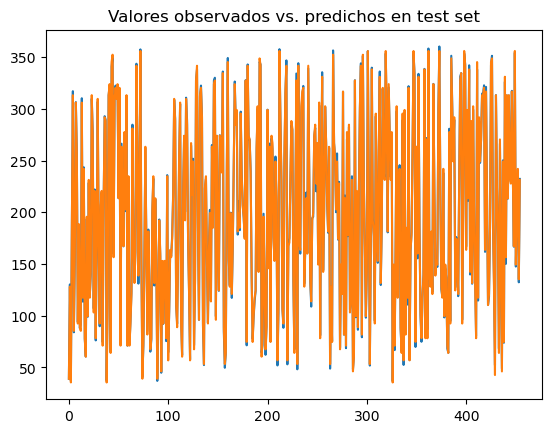

In [45]:
fig, ax = plt.subplots()
ax.plot(y_test)
ax.plot(predicciones_test)
plt.title("Valores observados vs. predichos en test set")

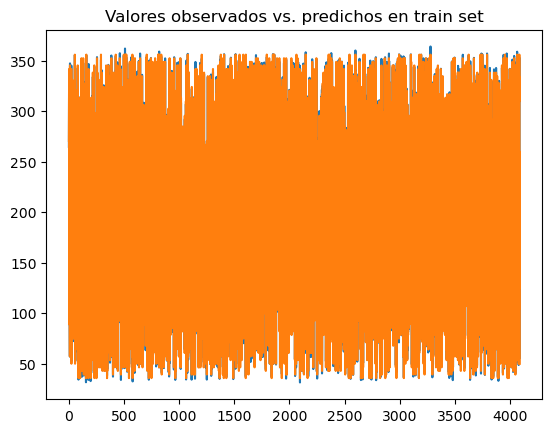

In [46]:
fig, ax = plt.subplots()
ax.plot(y_train)
ax.plot(predicciones_train)
plt.title("Valores observados vs. predichos en train set");